In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import re
import string
from nltk.stem import PorterStemmer
# from gensim.models import word2vec
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
# from tsne import bh_sne
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [ ]:
!pip install pronouncing

In [ ]:
import pronouncing

In [ ]:
df = pd.read_csv("/content/all-1.csv")

In [ ]:
df

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore
...,...,...,...,...,...
568,SARA TEASDALE,"With the man I love who loves me not,\r\nI wal...",Union Square,Modern,Love
569,HART CRANE,"Hart Crane, ""Voyages I, II, III, IV, V, VI"" fr...",Voyages,Modern,Love
570,WILLIAM BUTLER YEATS,"When you are old and grey and full of sleep,\r...",When You Are Old,Modern,Love
571,CARL SANDBURG,"Give me hunger,\r\nO you gods that sit and giv...",At a Window,Modern,Love


In [ ]:
class clean_text:
  
  def split_text(self, t):
      return t.apply(lambda x: str(x).split(" "))

  def to_lower(self, t):
      return t.apply(lambda x:   str(x).lower())

  #remove social media menations like @obama
  def remove_mentions(self,t):
      return t.apply(lambda x:  re.sub(r'@\w+', '', str(x)))

  def remove_numbers(self, t):
      return t.apply(lambda x: re.sub(r'\d+', '', str(x)))

  #remove url, like www.google.com
  def remove_urls(self, t):
      return t.apply(lambda x: re.sub(r'http.?://[^\s]+[\s]?', '', str(x)))

  def remove_punctuation(self,t):
        return t.apply(lambda x: str(x).translate(str.maketrans('','',string.punctuation)))



  #remove words like: of, a, an , the and so on

  def remove_stopwords_eng(self, t):
      stop_words_eng = nltk.corpus.stopwords.words("english")
      return t.apply(lambda x: [word for word in str(x).split(" ") if word not in stop_words_eng])

  """
  Stemming is the process of reducing inflection in words to their root forms such as mapping 
  a group of words to the same stem even if the stem itself is not a valid word in the Language." 
  Stem (root) is the part of the word 
  to which you add inflectional (changing/deriving) affixes such as (-ed,-ize, -s,-de,mis).


  """



  def stemming(self,t):
      temp= t.apply(lambda x: str(x).split(" "))
      porter = PorterStemmer()
      stemmed = temp.apply(lambda x: porter.stem(" ".join(x)))
      return stemmed

  def remove_new_line(self, t):
      return t.apply(lambda x:   str(x).replace("\n", " "))


  def ready_data(self, t):
      t1 = self.remove_mentions(t)
      t2 = self.remove_urls(t1)
      t3 = self.remove_punctuation(t2)
      t4 = self.to_lower(t3)
      t5 = self.remove_numbers(t4)
      t6 = self.stemming(t5)
      t7 = self.remove_stopwords_eng(t6)
      
      return t7

In [ ]:
cleaner = clean_text()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
clean_text= cleaner.ready_data(df['content'])

In [ ]:
df['clean_text']=clean_text

In [ ]:
clean_text

0      [let, bird, loudest, lay\r\non, sole, arabian,...
1      [sir, charles, chamber, coming, in\r\nwhen, wr...
2      [vice, runs, beyond, old, men, saw\r\nand, far...
3      [lo, man, whose, muse, whilome, maske\r\nas, t...
4      [long, longd, see, love, againe\r\nstill, wish...
                             ...                        
568    [man, love, loves, not\r\ni, walked, streetlam...
569    [hart, crane, voyages, ii, iii, iv, v, vi, com...
570    [old, grey, full, sleep\r\nand, nodding, fire,...
571    [give, hunger\r\no, gods, sit, give\r\nthe, wo...
572    [potuia, potuia\r\nwhite, grave, goddess\r\npi...
Name: content, Length: 573, dtype: object

In [ ]:
nltk.download('cmudict')

[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


True

In [ ]:
words = sum(list(clean_text), [])

In [ ]:
words = [w.replace("\r", "") for w in words ]
words = [w.replace("\n", "") for w in words ]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=nltk.corpus.stopwords.words("english"),
max_features= 500, # keep top 500 terms 
max_df = 0.5, 
smooth_idf=True)



In [ ]:
X = vectorizer.fit_transform(words)
tfidf_feature_names = vectorizer.get_feature_names()
# tfidf_feature_names

In [ ]:
vect = CountVectorizer(tokenizer = lambda x: x.split(), binary = 'true')
y = vect.fit_transform(df['type'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X[:573], y, test_size=0.33, random_state=42)

In [ ]:
#sgd classifier

classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print("accuracy :",classifier.score(X_train, y_train))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

accuracy : 0.6292428198433421
macro f1 score : 0.1835519030133473
micro f1 scoore : 0.5707547169811321
hamming loss : 0.19157894736842104
Precision recall report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        22
           2       0.64      0.98      0.78       119
           3       0.00      0.00      0.00        22
           4       0.50      0.08      0.14        49

   micro avg       0.64      0.52      0.57       234
   macro avg       0.23      0.21      0.18       234
weighted avg       0.43      0.52      0.42       234
 samples avg       0.63      0.64      0.64       234



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


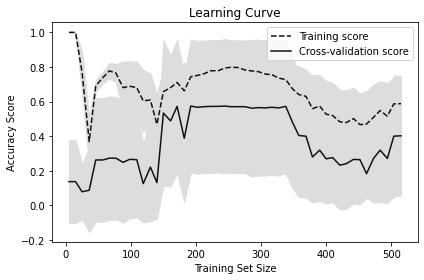

In [ ]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(classifier, 
                                                        X[:573], 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
real_predictions = vect.inverse_transform(predictions)
real_predictions = ["".join(x) for x in real_predictions]

In [ ]:
pd.DataFrame(zip(df['type'], real_predictions), columns=['real_data', 'predictions'])

,real_data,predictions
0,Mythology & Folklore,love
1,Mythology & Folklore,love
2,Mythology & Folklore,love
3,Mythology & Folklore,love
4,Mythology & Folklore,love
...,...,...
185,Love,love
186,Love,love
187,Love,love
188,Love,love


In [ ]:
#add rhyme words
rhymes_ = [words]

for w in words:
  rhymes_.append(pronouncing.rhymes(w)[:4])



In [ ]:
rhymes_ = sum(rhymes_ , [])

In [ ]:
X = vectorizer.fit_transform(rhymes_)
tfidf_feature_names = vectorizer.get_feature_names()
# tfidf_feature_names

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X[:573], y, test_size=0.33, random_state=42)

In [ ]:
#sgd classifier

classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print("accuracy :",classifier.score(X_train, y_train))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

accuracy : 0.608355091383812
macro f1 score : 0.183037062855815
micro f1 scoore : 0.5694117647058824
hamming loss : 0.19263157894736843
Precision recall report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        22
           2       0.64      0.98      0.77       119
           3       0.00      0.00      0.00        22
           4       0.50      0.08      0.14        49

   micro avg       0.63      0.52      0.57       234
   macro avg       0.23      0.21      0.18       234
weighted avg       0.43      0.52      0.42       234
 samples avg       0.63      0.64      0.64       234



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#extract top words and topics

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

TruncatedSVD(algorithm='randomized', n_components=10, n_iter=100,
             random_state=122, tol=0.0)

In [ ]:
# LSA, https://en.wikipedia.org/wiki/Latent_semantic_analysis

In [ ]:
terms = vectorizer.get_feature_names()


num_of_words = 7
for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:num_of_words]
    print("Topic "+str(i)+": ")
    print(" ".join([word[0] for word in sorted_terms]))
        

Topic 0: 
thy thou love thee doth one shall
Topic 1: 
copyright permission poems reprinted michael collected publishing
Topic 2: 
thy thou thee art thine dost hast
Topic 3: 
published poetry selected michael used anania new
Topic 4: 
ezra pound poetry reprinted corpor new published
Topic 5: 
michael anania ezra pound selected corpor new
Topic 6: 
love doth ye let loves true virtue
Topic 7: 
ye shall fair doth hath seek much
Topic 8: 
hart used ezra edited pound publishing published
Topic 9: 
hart one edited thou publishing go us


In [ ]:
#LDA

In [ ]:
clean_text

0      [let, bird, loudest, lay\r\non, sole, arabian,...
1      [sir, charles, chamber, coming, in\r\nwhen, wr...
2      [vice, runs, beyond, old, men, saw\r\nand, far...
3      [lo, man, whose, muse, whilome, maske\r\nas, t...
4      [long, longd, see, love, againe\r\nstill, wish...
                             ...                        
568    [man, love, loves, not\r\ni, walked, streetlam...
569    [hart, crane, voyages, ii, iii, iv, v, vi, com...
570    [old, grey, full, sleep\r\nand, nodding, fire,...
571    [give, hunger\r\no, gods, sit, give\r\nthe, wo...
572    [potuia, potuia\r\nwhite, grave, goddess\r\npi...
Name: content, Length: 573, dtype: object

In [ ]:
# tokenization
tokenized_doc = clean_text.apply(lambda x: x)

In [ ]:
words = sum(tokenized_doc.to_list(), [])

In [ ]:
import gensim.corpora as corpora

id2word = corpora.Dictionary([words])
# Create Corpus
texts = words
# Term Document Frequency
corpus = [id2word.doc2bow([text]) for text in texts]
# View
# print(corpus)

In [ ]:
import gensim
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
lda_df = pd.DataFrame()
data_dict = {}



for index, topic in lda_model.show_topics(formatted=False, num_words= 10):
  words = [w[0] for w in topic]
  words = " ".join(words)
  print("Topic {index}:".format(index=index),words)
  data_dict[index]=words


Topic 0: love little back much light remember must honey though yellow
Topic 1: upon would world white let thee body  among blue
Topic 2: permission de long take comes die many things silver soft
Topic 3: one poems old thou life first earth keep lips evening
Topic 4: like copyright face make great poetry good walked loved hear
Topic 5: go heart thy know dark time could say hand wind
Topic 6:  us man see sun red since pound beautiful young
Topic 7: still look eyes new come soul night green water beauty
Topic 8: reprinted 
and used find sweet men give deep grow shadow
Topic 9: shall never far may last went woman published turn music


In [ ]:
lda_df["topic"]=data_dict.keys()
lda_df["words"]=data_dict.values()

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

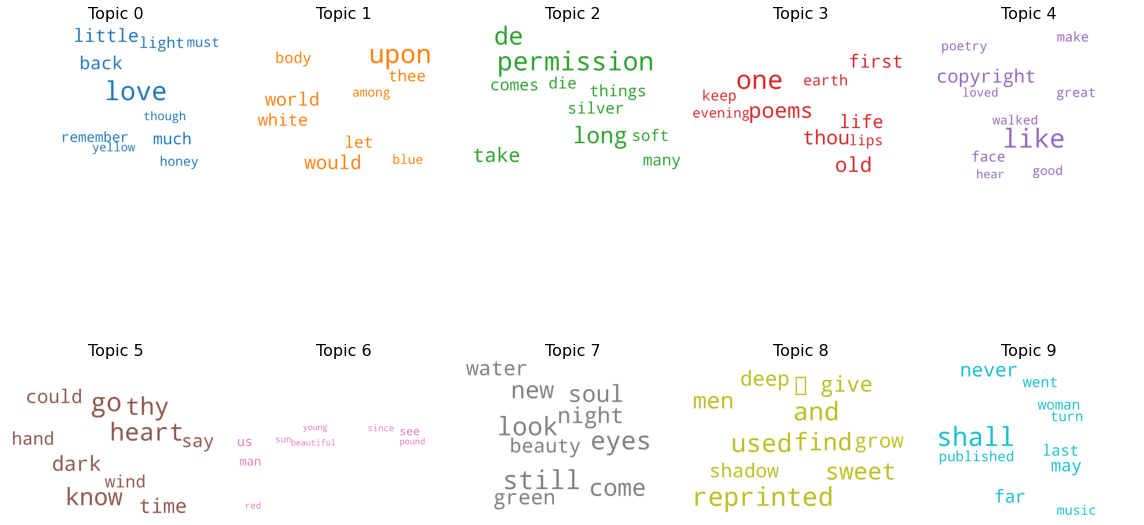

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=nltk.corpus.stopwords.words("english"),
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

# topics = svd_model.show_topics(formatted=False)


fig, axes = plt.subplots(2, 5, figsize=(16,12), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()